In [22]:
from importlib import reload
import scModel
reload(scModel)


<module 'scModel' from 'c:\\Users\\atsch\\Desktop\\MasterVorlesungen\\Sommer25\\Lieb-Lattice\\scModel.py'>

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
#import seaborn as sns

In [24]:
mM = scModel.Model(Del0=1, Deld=1, Dels=0, mu=1)


In [25]:
#params = np.concatenate(np.linspace(0, 2, 10), np.linspace(0, 2, 10), )
#params_s = [(d0*0.2, dd*0.2, ds*0.2) for d0 in range(10) for dd in range(10) for ds in range(10)]
params_s = [(d0, 0, ds) for ds in np.linspace(0.1,2,10) for d0 in np.linspace(0.1,2,10)]
params_d = [(d0, dd, 0) for dd in np.linspace(0.1,2,10) for d0 in np.linspace(0.1,2,10)]


In [26]:
mM.simple_stats()['mingap']

c:\Users\atsch\Desktop\MasterVorlesungen\Sommer25\Lieb-Lattice\scModel.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  eig[i]=np.sort(e)


array([0.00071164, 0.04522749, 0.01910525, 0.04522749, 0.00071164])

In [27]:
mM.simple_stats()['maxe'][6]

1.4135019239279512

In [28]:
maxe = np.ones((100, 100))
ave = np.ones((100, 100))
std = np.ones((100, 100))
mingap_mid = np.ones((100, 100))
mingap_mid_to_up = np.ones((100, 100))
avgap = np.ones((100, 100))

#params = np.concatenate()
for i in range(10):
    mu = i*0.2
    for j in range(100):
        #mM.Del0, mM.DelD, mM.DelS = params_s[j]
        d0, dd, ds = params_s[j]
        mM = scModel.Model(Del0=d0, Deld=dd, Dels=ds, mu=mu)
        stat = mM.simple_stats()
        
        maxe[10*i:10*(i+1),j] = stat['maxe'][6]
        ave[10*i:10*(i+1),j] = stat['av'][6]
        std[10*i:10*(i+1),j] = stat['std'][6]
        mingap_mid[10*i:10*(i+1),j] = stat['mingap'][2]
        mingap_mid_to_up[10*i:10*(i+1),j] = stat['mingap'][3]
        avgap[10*i:10*(i+1),j] = stat['avgap'][2]

In [29]:
d_maxe = np.ones((100, 100))
d_ave = np.ones((100, 100))
d_std = np.ones((100, 100))
d_mingap_mid = np.ones((100, 100))
d_mingap_mid_to_up = np.ones((100, 100))
d_avgap = np.ones((100, 100))

#params = np.concatenate()
for i in range(10):
    mu = i*0.2
    for j in range(100):
        #mM.Del0, mM.DelD, mM.DelS = params_s[j]
        d0, dd, ds = params_d[j]
        mM = scModel.Model(Del0=d0, Deld=dd, Dels=ds, mu=mu)
        stat = mM.simple_stats()

        d_maxe[10*i:10*(i+1),j] = stat['maxe'][6]
        d_ave[10*i:10*(i+1),j] = stat['av'][6]
        d_std[10*i:10*(i+1),j] = stat['std'][6]
        d_mingap_mid[10*i:10*(i+1),j] = stat['mingap'][2]
        d_mingap_mid_to_up[10*i:10*(i+1),j] = stat['mingap'][3]
        d_avgap[10*i:10*(i+1),j] = stat['avgap'][2]

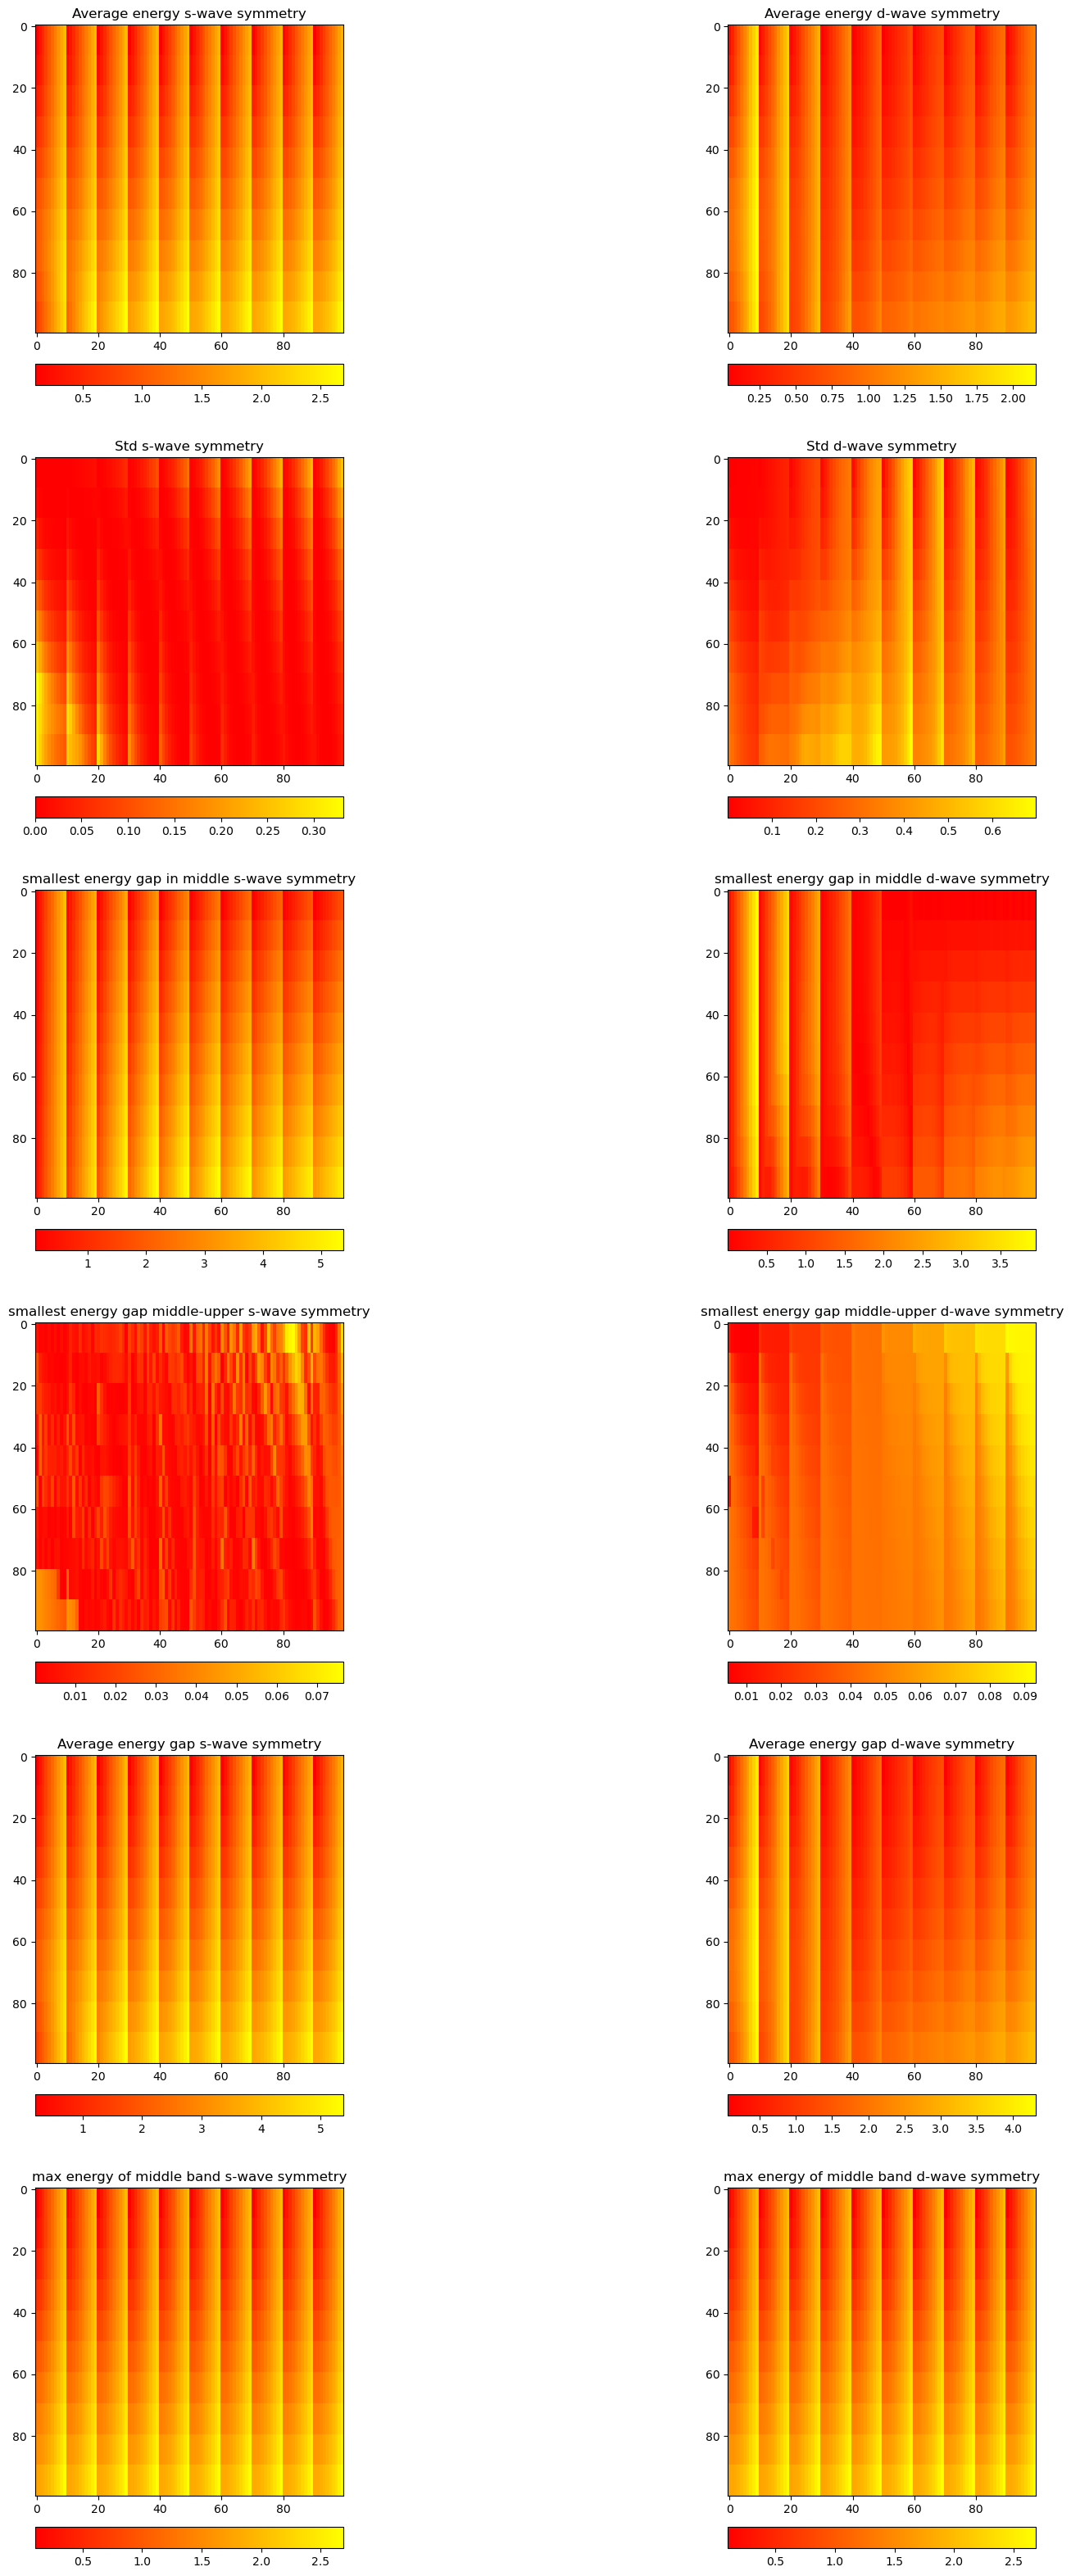

In [34]:
fig, axes = plt.subplots(6, 2, figsize=(20,40))
axes[0,0].set_title("Average energy s-wave symmetry")
axes[0,1].set_title("Average energy d-wave symmetry")
axes[1, 0].set_title("Std s-wave symmetry")
axes[1, 1].set_title("Std d-wave symmetry")
axes[2, 0].set_title("smallest energy gap in middle s-wave symmetry")
axes[2, 1].set_title("smallest energy gap in middle d-wave symmetry")
axes[3, 0].set_title("smallest energy gap middle-upper s-wave symmetry")
axes[3, 1].set_title("smallest energy gap middle-upper d-wave symmetry")
axes[4, 0].set_title("Average energy gap s-wave symmetry")
axes[4, 1].set_title("Average energy gap d-wave symmetry")
axes[5, 0].set_title("max energy of middle band s-wave symmetry")
axes[5, 1].set_title("max energy of middle band d-wave symmetry")

av_s = axes[0,0].imshow(ave, cmap='autumn') # Visualize the Hamiltonian matrix
av_d = axes[0,1].imshow(d_ave, cmap='autumn')
std_s = axes[1,0].imshow(std, cmap='autumn') # Visualize the Hamiltonian matrix
std_d = axes[1,1].imshow(d_std, cmap='autumn')
egm_s = axes[2,0].imshow(mingap_mid, cmap='autumn') # Visualize the Hamiltonian matrix
egm_d = axes[2,1].imshow(d_mingap_mid, cmap='autumn')
egum_s = axes[3,0].imshow(mingap_mid_to_up, cmap='autumn') # Visualize the Hamiltonian matrix
egum_d = axes[3,1].imshow(d_mingap_mid_to_up, cmap='autumn')
egav_s = axes[4,0].imshow(avgap, cmap='autumn') # Visualize the Hamiltonian matrix
egav_d = axes[4,1].imshow(d_avgap, cmap='autumn')
maxe_s = axes[5,0].imshow(maxe, cmap='autumn') # Visualize the Hamiltonian matrix
maxe_d = axes[5,1].imshow(d_maxe, cmap='autumn')

ax1_divider = make_axes_locatable(axes[0,0])
cax1 = ax1_divider.append_axes("bottom", size="7%", pad="10%")
ax2_divider = make_axes_locatable(axes[0,1])
cax2 = ax2_divider.append_axes("bottom", size="7%", pad="10%")
fig.colorbar(av_s, cax=cax1, ax=axes[0,0], orientation="horizontal")
fig.colorbar(av_d, cax=cax2, ax=axes[0,1], orientation="horizontal")

ax3_divider = make_axes_locatable(axes[1,0])
cax3 = ax3_divider.append_axes("bottom", size="7%", pad="10%")
ax4_divider = make_axes_locatable(axes[1,1])
cax4 = ax4_divider.append_axes("bottom", size="7%", pad="10%")
fig.colorbar(std_s, cax=cax3, ax=axes[1,0], orientation="horizontal")
fig.colorbar(std_d, cax=cax4, ax=axes[1,1], orientation="horizontal")

ax5_divider = make_axes_locatable(axes[2,0])
cax5 = ax5_divider.append_axes("bottom", size="7%", pad="10%")
ax6_divider = make_axes_locatable(axes[2,1])
cax6 = ax6_divider.append_axes("bottom", size="7%", pad="10%")
fig.colorbar(egm_s, cax=cax5, ax=axes[2,0], orientation="horizontal")
fig.colorbar(egm_d, cax=cax6, ax=axes[2,1], orientation="horizontal")

ax7_divider = make_axes_locatable(axes[3,0])
cax7 = ax7_divider.append_axes("bottom", size="7%", pad="10%")
ax8_divider = make_axes_locatable(axes[3,1])
cax8 = ax8_divider.append_axes("bottom", size="7%", pad="10%")
fig.colorbar(egum_s, cax=cax7, ax=axes[3,0], orientation="horizontal")
fig.colorbar(egum_d, cax=cax8, ax=axes[3,1], orientation="horizontal")

ax9_divider = make_axes_locatable(axes[4,0])
cax9 = ax9_divider.append_axes("bottom", size="7%", pad="10%")
ax10_divider = make_axes_locatable(axes[4,1])
cax10 = ax10_divider.append_axes("bottom", size="7%", pad="10%")
fig.colorbar(egav_s, cax=cax9, ax=axes[4,0], orientation="horizontal")
fig.colorbar(egav_d, cax=cax10, ax=axes[4,1], orientation="horizontal")

ax11_divider = make_axes_locatable(axes[5,0])
cax11 = ax11_divider.append_axes("bottom", size="7%", pad="10%")
ax12_divider = make_axes_locatable(axes[5,1])
cax12 = ax12_divider.append_axes("bottom", size="7%", pad="10%")
fig.colorbar(maxe_s, cax=cax11, ax=axes[5,0], orientation="horizontal")
fig.colorbar(maxe_d, cax=cax12, ax=axes[5,1], orientation="horizontal")

#ax2_divider = make_axes_locatable(axes[0])
#cax2 = ax2_divider.append_axes("top", size="7%", pad="2%")



plt.show()


In [35]:
maxe-d_maxe

array([[1.97336901e-06, 6.14458689e-06, 1.03319233e-05, ...,
        8.44194903e-04, 1.17966518e-03, 1.78562989e-03],
       [1.97336901e-06, 6.14458689e-06, 1.03319233e-05, ...,
        8.44194903e-04, 1.17966518e-03, 1.78562989e-03],
       [1.97336901e-06, 6.14458689e-06, 1.03319233e-05, ...,
        8.44194903e-04, 1.17966518e-03, 1.78562989e-03],
       ...,
       [2.58868678e-04, 7.92790017e-04, 1.30091571e-03, ...,
        8.31994980e-04, 9.35461100e-04, 1.07435637e-03],
       [2.58868678e-04, 7.92790017e-04, 1.30091571e-03, ...,
        8.31994980e-04, 9.35461100e-04, 1.07435637e-03],
       [2.58868678e-04, 7.92790017e-04, 1.30091571e-03, ...,
        8.31994980e-04, 9.35461100e-04, 1.07435637e-03]])